# Preço de casas na California

## Importação de bibliotecas e base

In [152]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [153]:
file=pd.read_csv('housing.csv')

## Limpeza dos dados

In [154]:
file.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [155]:
file.duplicated().sum()

0

In [156]:
file=file.query('total_bedrooms>0')
file

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Localização geográfica das casas

In [157]:
california_map=folium.Map(location=[37.2691675,-119.306607],zoom_start=6)
locations=list(zip(file['latitude'],file['longitude']))
from folium.plugins import FastMarkerCluster
FastMarkerCluster(data=locations).add_to(california_map)
california_map

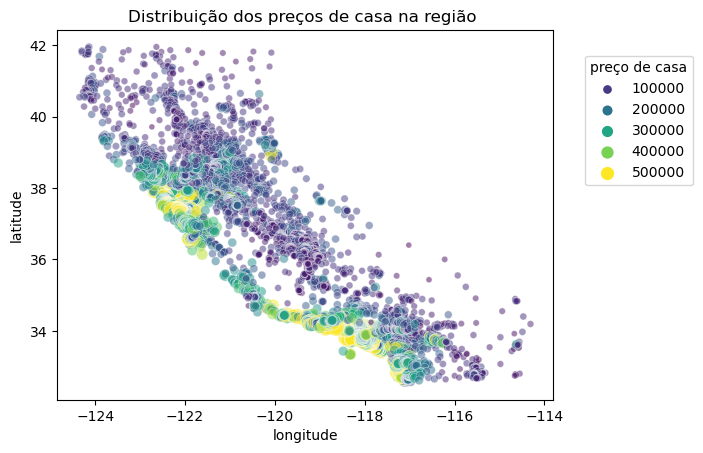

In [158]:
sns.scatterplot(data = file, x = "longitude", y = "latitude", size = "median_house_value", hue = "median_house_value", palette = "viridis", alpha=0.5) 
plt.legend(title = "preço de casa", bbox_to_anchor = (1.05, 0.95), loc = "upper left") 
plt.title("Distribuição dos preços de casa na região ");

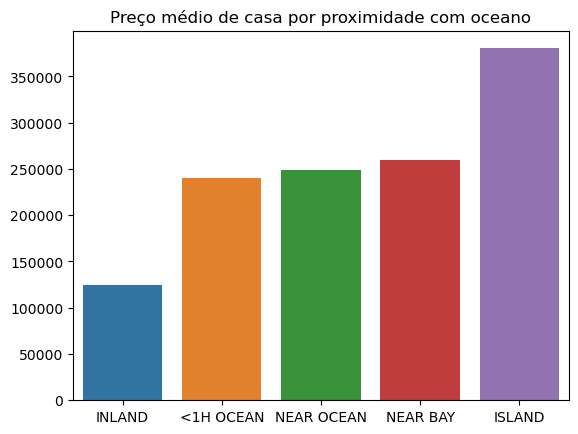

In [159]:
ocean_proximity=file.groupby("ocean_proximity")['median_house_value'].mean().round().reset_index().sort_values(by='median_house_value')
fig_ocean_proximity=sns.barplot(data=ocean_proximity,x=ocean_proximity['ocean_proximity'],y=ocean_proximity['median_house_value']);
fig_ocean_proximity.set_xlabel("");
fig_ocean_proximity.set_ylabel("");
fig_ocean_proximity.set_title("Preço médio de casa por proximidade com oceano");

### Transformar variável categórica em numero.

In [160]:
ML_file=pd.get_dummies(file,columns=['ocean_proximity'])
ML_file

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [161]:
ML_file=ML_file.rename(columns={'ocean_proximity_<1H OCEAN':"1H_OCEAN",'ocean_proximity_INLAND':'INLAND','ean_proximity_ISLAND':'ISLAND'
                                ,'ocean_proximity_NEAR BAY':'NEAR_BAY','ocean_proximity_NEAR OCEAN':'NEAR_OCEAN'})

## Definindo modelo de regressão linear com a base atual

### Divisão da base: 60% treino / 20% validação / 20% treino

In [10]:
from sklearn.model_selection import train_test_split
X=ML_file.drop('median_house_value',axis=1)
Y=ML_file['median_house_value']

X_main,X_test,Y_main,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_val,Y_train,Y_val=train_test_split(X_main,Y_main,test_size=0.25,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
reg_default=LinearRegression()
reg_default.fit(X_train,Y_train)

LinearRegression()

In [12]:
Y_val_pred = reg_default.predict(X_val)
Y_test_pred = reg_default.predict(X_test)
Y_train_pred = reg_default.predict(X_train)

In [13]:
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score

r2_pred= r2_score(Y_test, Y_test_pred)
r2_val = r2_score(Y_val, Y_val_pred)
r2_train=r2_score(Y_train,Y_train_pred)

train_mse = mean_squared_error(Y_train, Y_train_pred)
val_mse = mean_squared_error(Y_val, Y_val_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

print("Erro MSE no treino:",train_mse.round())
print("Erro MSE na validação:",val_mse.round())
print("Diferença % entre treino e validação:",((train_mse-val_mse)/val_mse)*100)

Erro MSE no treino: 4741286752.0
Erro MSE na validação: 4545450707.0
Diferença % entre treino e validação: 4.308396636834651


In [147]:
m1_score=np.average(KFscore)
m1_mse_train=train_mse.round()
m1_mse_val=val_mse.round()
mse_perc_m1=((train_mse-val_mse)/(val_mse))*100
m1_df=[m1_mse_train,m1_mse_val,mse_perc_m1,m1_score]
m1_df=pd.DataFrame([m1_df])
m1_df

,0,1,2,3
0,4.741287e+09,4.545451e+09,4.308397,0.644179


#### Usando validação cruzada para avaliar perfomance do modelo:

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,shuffle=True,random_state=42)
KFscore=cross_val_score(reg_default,X,Y,cv=kf,scoring='r2')
print("Score médio usando validação cruzada:",np.average(KFscore))

Score médio usando validação cruzada: 0.6441791871175282


### Observações sobre o primeiro modelo:
#### Apresenta um score médio de 64%
#### Comparando o erro MSE no treino e na validação, verificou-se que o erro de treino é um pouco maior que na validação, logo, há uma tendência de underfitting: a generalização/validação não está boa o suficiente ainda. 

#### Ainda não houve nenhum pré-processamento, portanto, existem possibilidades para melhorar esse modelo.

## Fazendo pré-processamentos de dados para buscar melhorar o desempenho do modelo

In [15]:
ML_file2=ML_file

#### Nível de correlação entre variáveis da base

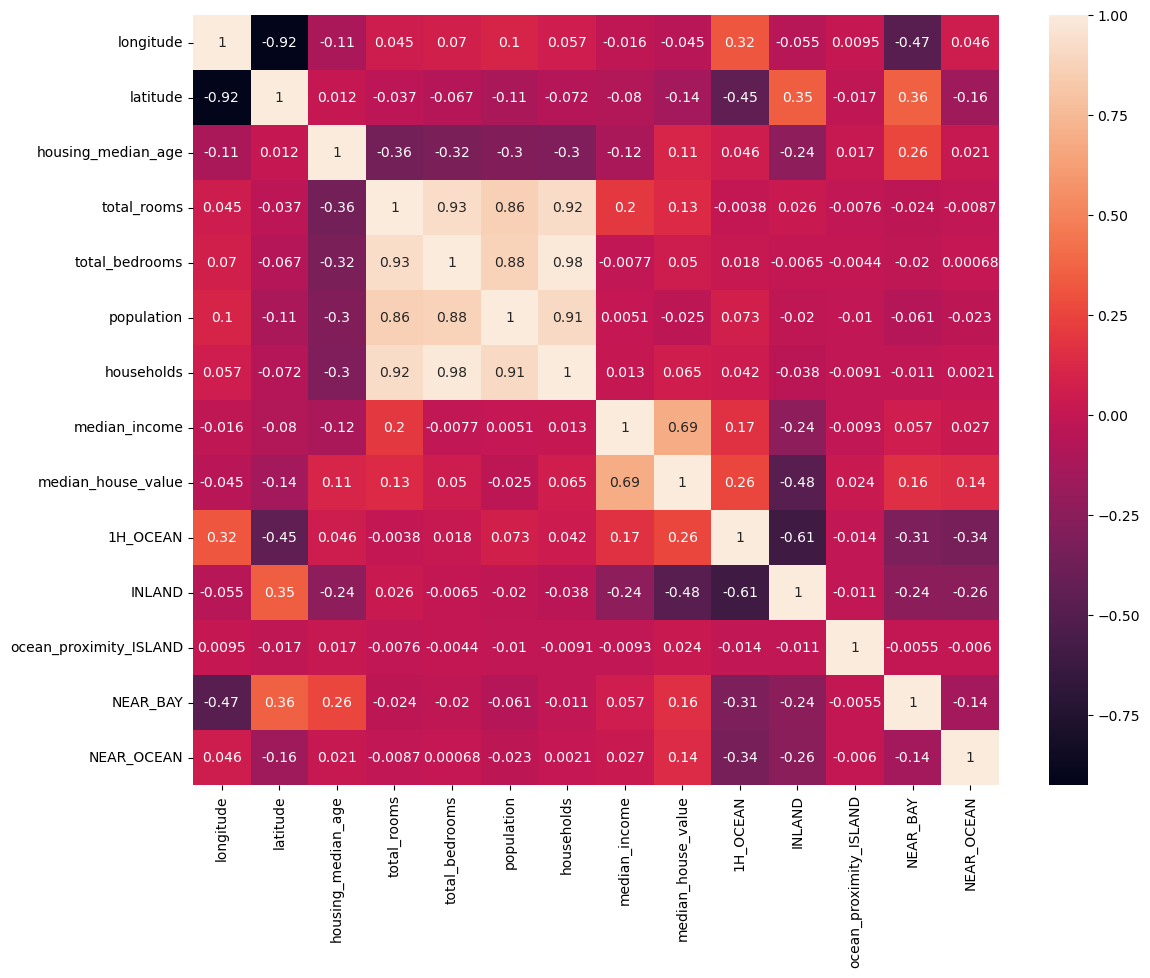

In [16]:
fig=plt.figure(figsize=(13,10))
sns.heatmap(ML_file2.corr(),annot=True);

#### Correlação entre as demais variáveis com a variável alvo (median_house_value)

In [17]:
ML_file2.corr()['median_house_value'].sort_values(ascending=False)

median_house_value        1.000000
median_income             0.688355
1H_OCEAN                  0.257614
NEAR_BAY                  0.160526
NEAR_OCEAN                0.140378
total_rooms               0.133294
housing_median_age        0.106432
households                0.064894
total_bedrooms            0.049686
ocean_proximity_ISLAND    0.023525
population               -0.025300
longitude                -0.045398
latitude                 -0.144638
INLAND                   -0.484787
Name: median_house_value, dtype: float64

##### Informações estatísticas:

In [18]:
ML_file2.describe().round()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,1H_OCEAN,INLAND,ocean_proximity_ISLAND,NEAR_BAY,NEAR_OCEAN
count,20433.0,20433.0,20433.0,20433.0,20433.0,20433.0,20433.0,20433.0,20433.0,20433.0,20433.0,20433.0,20433.0,20433.0
mean,-120.0,36.0,29.0,2637.0,538.0,1425.0,499.0,4.0,206864.0,0.0,0.0,0.0,0.0,0.0
std,2.0,2.0,13.0,2185.0,421.0,1133.0,382.0,2.0,115436.0,0.0,0.0,0.0,0.0,0.0
min,-124.0,33.0,1.0,2.0,1.0,3.0,1.0,0.0,14999.0,0.0,0.0,0.0,0.0,0.0
25%,-122.0,34.0,18.0,1450.0,296.0,787.0,280.0,3.0,119500.0,0.0,0.0,0.0,0.0,0.0
50%,-118.0,34.0,29.0,2127.0,435.0,1166.0,409.0,4.0,179700.0,0.0,0.0,0.0,0.0,0.0
75%,-118.0,38.0,37.0,3143.0,647.0,1722.0,604.0,5.0,264700.0,1.0,1.0,0.0,0.0,0.0
max,-114.0,42.0,52.0,39320.0,6445.0,35682.0,6082.0,15.0,500001.0,1.0,1.0,1.0,1.0,1.0


In [19]:
col=['total_rooms','total_bedrooms','population','households','median_income']

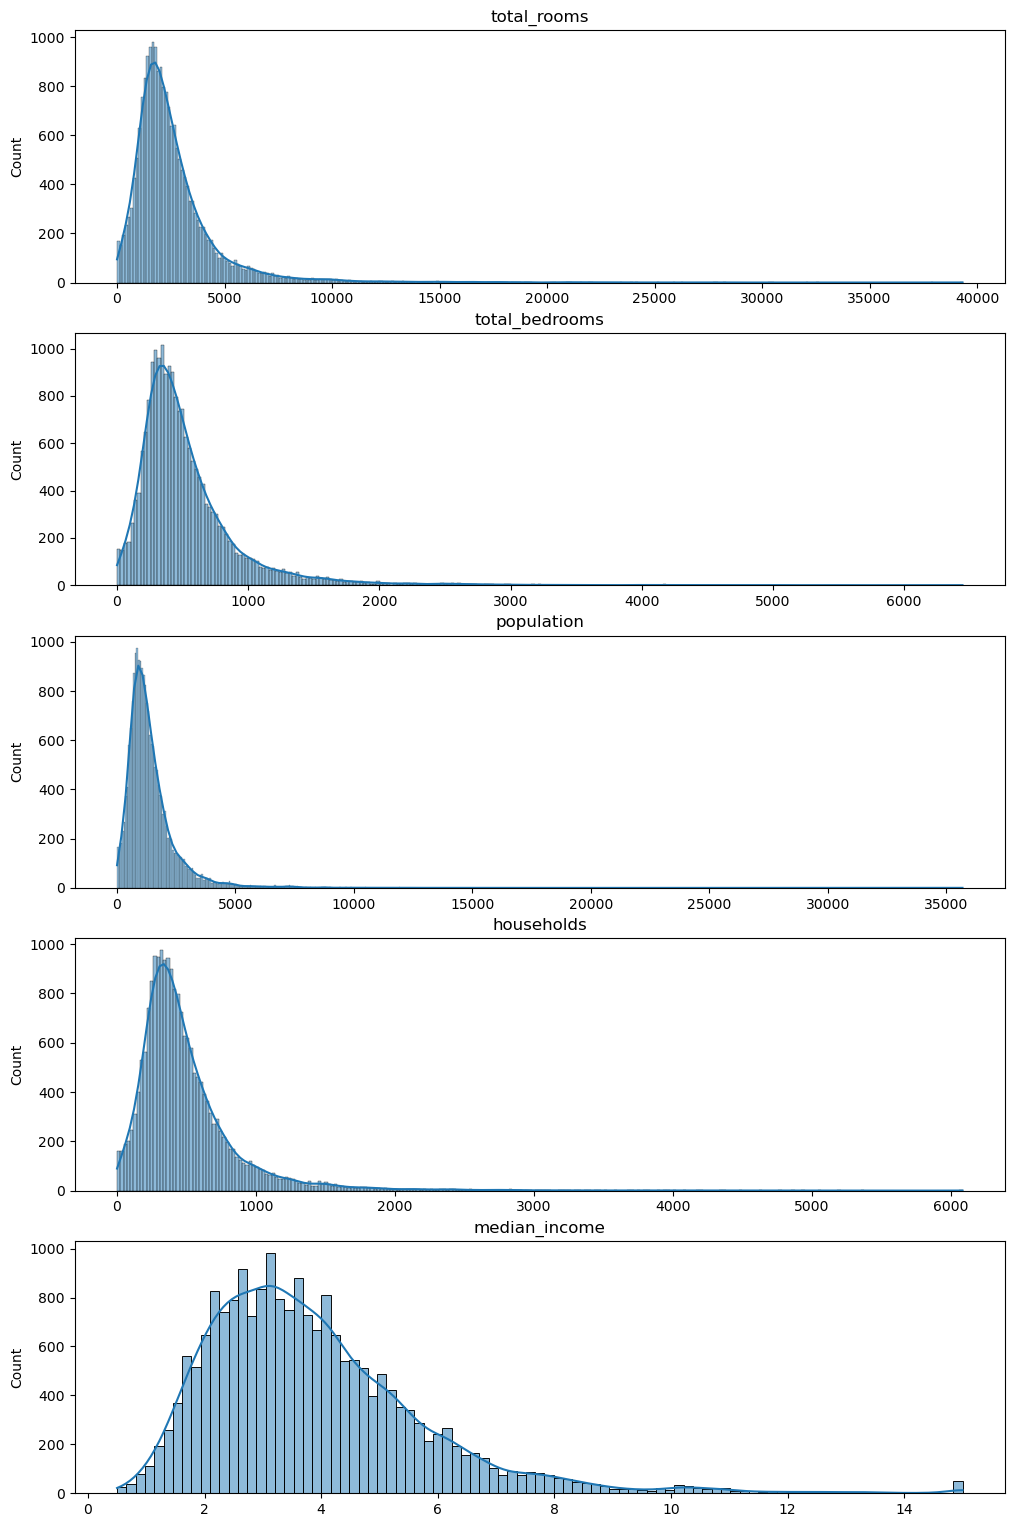

In [20]:
figs,axs=plt.subplots(nrows=5,ncols=1,figsize=(12,19))
for i,cols in enumerate(col):
    fig1=sns.histplot(data=ML_file2,x=ML_file2[cols],ax=axs[i],kde=True)
    fig1.set_title(col[i])
    fig1.set_xlabel("")

### Observações:
#### Há uma diferença muito alta na escala de valores das variáveis: 'total_rooms','total_bedrooms','population' e 'households'
#### O desvio padrão e média dessas variáveis são bem elevados
#### Isso pode ser observado no formato de seus histogramas, indicando que a distribuição não é Gaussiana

#### Até então, duas etapas de pré processamento foram feitas: Limpeza e conversão das variáveis categóricas. 
### A próxima etapa de pré processamento agora será corrigir essa escala de valores.

In [21]:
from sklearn.preprocessing import Normalizer
ML_file2[['total_rooms','total_bedrooms','population','households']] = Normalizer().fit_transform(ML_file2[['total_rooms','total_bedrooms','population','households']])

In [22]:
ML_file2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,1H_OCEAN,INLAND,ocean_proximity_ISLAND,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41.0,0.922186,0.135184,0.337436,0.132040,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,0.926736,0.144382,0.313438,0.148560,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,0.934275,0.121004,0.315883,0.112724,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,0.892498,0.164629,0.390906,0.153420,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,0.922315,0.158727,0.320288,0.146822,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,0.861524,0.193520,0.437230,0.170753,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,0.865828,0.186333,0.442231,0.141613,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,0.882919,0.189980,0.394454,0.169611,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,0.897205,0.197289,0.357435,0.168347,1.8672,84700.0,0,1,0,0,0


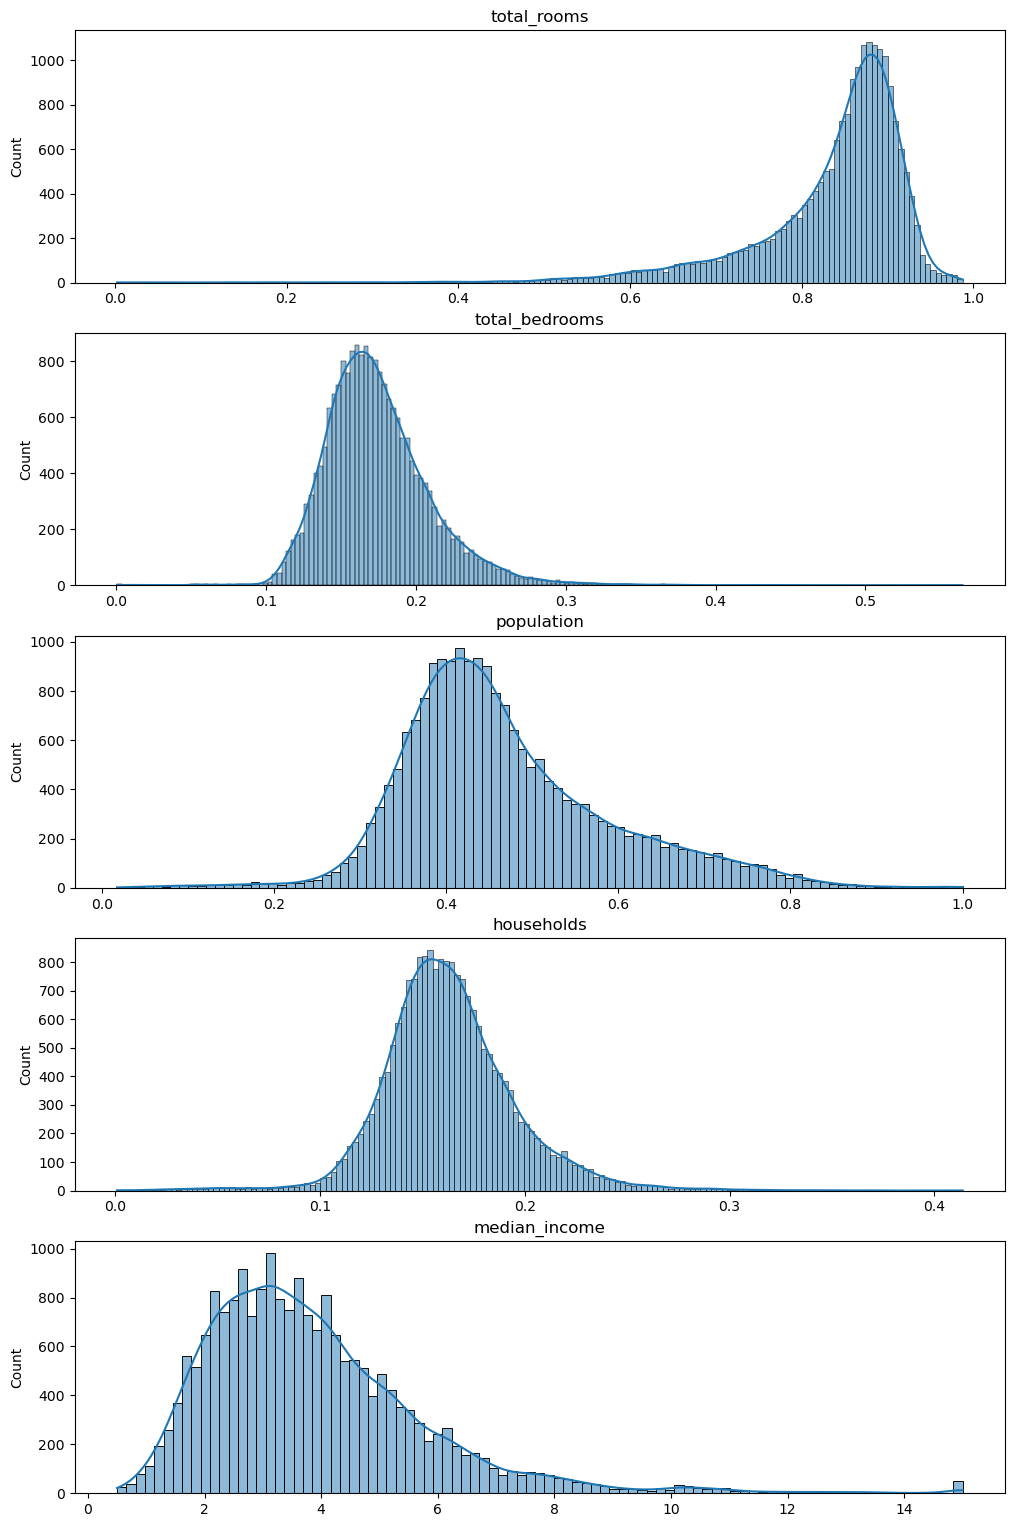

In [23]:
figs,axs=plt.subplots(nrows=5,ncols=1,figsize=(12,19))
for i,cols in enumerate(col):
    fig1=sns.histplot(data=ML_file2,x=ML_file2[cols],ax=axs[i],kde=True)
    fig1.set_title(col[i])
    fig1.set_xlabel("")

#### Após o ajuste, nota-se também como os valores da correlação foram ajustados

In [24]:
ML_file2.corr()['median_house_value'].sort_values(ascending=False)

median_house_value        1.000000
median_income             0.688355
total_rooms               0.332710
1H_OCEAN                  0.257614
NEAR_BAY                  0.160526
NEAR_OCEAN                0.140378
housing_median_age        0.106432
ocean_proximity_ISLAND    0.023525
longitude                -0.045398
households               -0.122885
latitude                 -0.144638
total_bedrooms           -0.178129
population               -0.377895
INLAND                   -0.484787
Name: median_house_value, dtype: float64

## Criando novo modelo com base pré-processada

In [29]:
X2=ML_file2.drop('median_house_value',axis=1)
Y2=ML_file2['median_house_value']

X2_main,X2_test,Y2_main,Y2_test=train_test_split(X2,Y2,test_size=0.2,random_state=42)
X2_train,X2_val,Y2_train,Y2_val=train_test_split(X2_main,Y2_main,test_size=0.25,random_state=42)

In [30]:
reg_processed=LinearRegression()
reg_processed.fit(X2_train,Y2_train)

LinearRegression()

In [31]:
Y2_val_pred = reg_processed.predict(X2_val)
Y2_test_pred = reg_processed.predict(X2_test)
Y2_train_pred = reg_processed.predict(X2_train)


r2_pred2= r2_score(Y2_test, Y2_test_pred)
r2_val2 = r2_score(Y2_val, Y2_val_pred)
r2_train2=r2_score(Y2_train,Y2_train_pred)

train2_mse = mean_squared_error(Y2_train, Y2_train_pred)
val2_mse = mean_squared_error(Y2_val, Y2_val_pred)
test2_mse = mean_squared_error(Y2_test, Y2_test_pred)

print("Erro MSE no treino:",train2_mse.round())
print("Erro MSE na validação:",val2_mse.round())
print("Diferença % entre treino e validação:",((train2_mse-val2_mse)/val2_mse)*100)

kf2=KFold(n_splits=10,shuffle=True,random_state=42)
KF2score=cross_val_score(reg_prwocessed,X2,Y2,cv=kf2,scoring='r2')
print("Score médio usando validação cruzada:",np.average(KF2score))

Erro MSE no treino: 4232208937.0
Erro MSE na validação: 4133728393.0
Diferença % entre treino e validação: 2.3823661013860855
Score médio usando validação cruzada: 0.6806272222243799


In [60]:
m2_score=np.average(KF2score)
m2_mse_train=train2_mse.round()
m2_mse_val=val2_mse.round()
mse_perc_m2=((train2_mse-val2_mse)/(val2_mse))*100
m2_df=[m2_mse_train,m2_mse_val,mse_perc_m2,m2_score]
m2_df=pd.DataFrame([m2_df])
m2_df

,0,1,2,3
0,4.232209e+09,4.133728e+09,2.382366,0.680627


### Observações:

#### Houve uma melhora razoável no modelo, seu score subiu de 64% para 68%
#### A diferença % de erro de treino e validação caiu de 4.3% para 2.3%

####

## Utilizando XGBRegressor

In [98]:
from xgboost import XGBRegressor
model_XGBR = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=180,  
    learning_rate=0.05,  
    max_depth=3,  
    subsample=0.8, 
    colsample_bytree=0.8 )

In [99]:
model_XGBR.fit(X2_train,Y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=180, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [100]:
Y_predict_XGBR=model_XGBR.predict(X2_test)


In [101]:
Y_val_pred_XGBR = model_XGBR.predict(X2_val)
Y_test_pred_XGBR = model_XGBR.predict(X2_test)
Y_train_pred_XGBR= model_XGBR.predict(X2_train)


r2_test_XGBR= r2_score(Y2_test, Y_test_pred_XGBR)
r2_val_XGBR = r2_score(Y2_val, Y_val_pred_XGBR)
r2_train_XGBR=r2_score(Y2_train,Y_train_pred_XGBR)

train_mse_XGBR = mean_squared_error(Y2_train, Y_train_pred_XGBR)
val_mse_XGBR = mean_squared_error(Y2_val, Y_val_pred_XGBR)
test_mse_XGBR = mean_squared_error(Y2_test, Y_test_pred_XGBR)

print("Erro MSE no treino:",train_mse_XGBR.round())
print("Erro MSE na validação:",val_mse_XGBR.round())
print("Diferença % entre treino e validação:",((train_mse_XGBR-val_mse_XGBR)/val_mse_XGBR)*100)

kf3=KFold(n_splits=10,shuffle=True,random_state=42)
KF3score=cross_val_score(model_XGBR,X2,Y2,cv=kf3,scoring='r2')
print("Score médio usando validação cruzada:",np.average(KF3score))

Erro MSE no treino: 2629277745.0
Erro MSE na validação: 2700916381.0
Diferença % entre treino e validação: -2.6523825726339885
Score médio usando validação cruzada: 0.79001387932754


In [102]:
m3_score=np.average(KF3score)
m3_mse_train=train_mse_XGBR.round()
m3_mse_val=val_mse_XGBR.round()
mse_perc_m3=((train_mse_XGBR-val_mse_XGBR)/(val_mse_XGBR))*100
m3_df=[m3_mse_train,m3_mse_val,mse_perc_m3,m3_score]
m3_df=pd.DataFrame([m3_df])
m3_df

,0,1,2,3
0,2.629278e+09,2.700916e+09,-2.652383,0.790014


## Conclusões

In [103]:
models_view=pd.DataFrame([])
models_view=pd.concat([m1_df,m2_df,m3_df])
models_view=models_view.reset_index(drop=True)
models_view=models_view.rename(index={0:"LR default",1:"LR_Pre_rocessed",2:"XGBRegressor"})
models_view=models_view.rename(columns={0:"MSE_treino",1:"MSE_validação",2:"Treino-Validação",3:"Score"})
models_view['MSE_treino']=(models_view['MSE_treino']/10**9).round(2)
models_view['MSE_validação']=(models_view['MSE_validação']/10**9).round(2)
models_view['Treino-Validação']=(models_view['Treino-Validação']).round(2)
models_view['Score']=(models_view['Score']).round(2)
models_view

,MSE_treino,MSE_validação,Treino-Validação,Score
LR default,4.74,4.55,4.31,0.64
LR_Pre_rocessed,4.23,4.13,2.38,0.68
XGBRegressor,2.63,2.70,-2.65,0.79


### Realizar as etapas de pré processamento de dado permitiu um aumento de 4% no score assim como uma redução considerável no erro MSE.
### XGBRegressor foi o modelo que permitiu o melhor score e maior redução do MSE.
